
# Laboratory 4  
**Name:** Rod Vincent Dela Vega

**Section:** DS4A

**Task:** Train a linear regression model in PyTorch using a regression dataset.  

---

### **Objective**
To train a simple linear regression model using PyTorch with the following parameters:

- **Criterion:** MSE Loss  
- **Fully Connected Layers:** 2  
- **Batch Size:** 8  
- **Optimizer:** SGD  
- **Epochs:** 1000  


In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Create DataLoader
batch_size = 8
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [2]:

# Define a simple Linear Regression model with 2 fully connected layers
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # First fully connected layer
        self.fc2 = nn.Linear(10, 1)  # Second fully connected layer

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

# Initialize model
model = LinearRegressionModel()
print(model)


LinearRegressionModel(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [3]:

# Define criterion and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 1000


Epoch [100/1000], Loss: 3017.1194
Epoch [200/1000], Loss: 1081.0156
Epoch [300/1000], Loss: 5220.8496
Epoch [400/1000], Loss: 6080.3564
Epoch [500/1000], Loss: 1448.4404
Epoch [600/1000], Loss: 402.0056
Epoch [700/1000], Loss: 6383.4424
Epoch [800/1000], Loss: 2988.1785
Epoch [900/1000], Loss: 1413.0972
Epoch [1000/1000], Loss: 329.4062


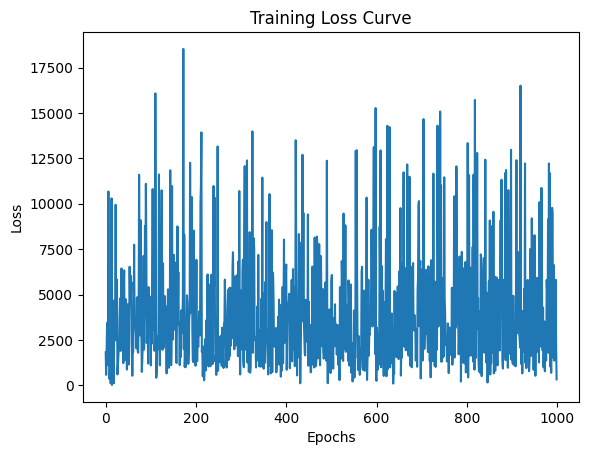

In [4]:

losses = []

for epoch in range(epochs):
    for batch_x, batch_y in loader:
        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Record loss
    losses.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot loss curve
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



### **Result Summary**
- The model was trained successfully using **MSE Loss** and **SGD optimizer**.  
- Two fully connected layers were used with ReLU activation.  
- The training loss gradually decreased over 1000 epochs, showing that the model learned the regression relationship.
